In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
df=pd.read_csv('../Project/archive/OTT service.csv',encoding = 'cp949')
df.head()

,연번,조사연도,국가,분류,구분,사례수(명),넷플릭스(비율),유튜브(비율),아마존프리미엄비디오(비율),디즈니플러스(비율),애플티비(비율),기타(비율)
0,1,2018,말레이시아,연령별,전체,192,24.0,22.9,0.0,0.0,0.0,10.4
1,2,2018,말레이시아,연령별,10대,36,38.9,22.2,0.0,0.0,0.0,11.1
2,3,2018,말레이시아,연령별,20대,48,20.8,20.8,0.0,0.0,0.0,10.4
3,4,2018,말레이시아,연령별,30대,45,20.0,17.8,0.0,0.0,0.0,11.1
4,5,2018,말레이시아,연령별,40대,44,20.5,25.0,0.0,0.0,0.0,13.6


In [3]:
df.tail()

,연번,조사연도,국가,분류,구분,사례수(명),넷플릭스(비율),유튜브(비율),아마존프리미엄비디오(비율),디즈니플러스(비율),애플티비(비율),기타(비율)
218,219,2020,UAE,직업별,가사노동자,28,21.4,32.1,3.6,0.0,3.6,7.1
219,220,2020,UAE,직업별,은퇴자,16,43.8,18.8,12.5,0.0,0.0,0.0
220,221,2020,UAE,직업별,무직/구직 중,12,50.0,25.0,8.3,0.0,0.0,0.0
221,222,2020,UAE,소득별,평균 이하,165,33.9,23.6,4.2,0.6,1.8,8.4
222,223,2020,UAE,소득별,평균 이상,122,45.1,25.4,7.4,0.0,0.0,4.1


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   연번              223 non-null    int64  
 1   조사연도            223 non-null    int64  
 2   국가              223 non-null    object 
 3   분류              223 non-null    object 
 4   구분              223 non-null    object 
 5   사례수(명)          223 non-null    int64  
 6   넷플릭스(비율)        223 non-null    float64
 7   유튜브(비율)         223 non-null    float64
 8   아마존프리미엄비디오(비율)  223 non-null    float64
 9   디즈니플러스(비율)      223 non-null    float64
 10  애플티비(비율)        223 non-null    float64
 11  기타(비율)          223 non-null    float64
dtypes: float64(6), int64(3), object(3)
memory usage: 21.0+ KB
None


In [5]:
print(df.shape)

(223, 12)


In [6]:
df = df.drop(columns=['연번'])

In [7]:
Asia_df = df[(df['분류'] == '연령별') & (df['국가'].isin(['말레이시아', '베트남', '싱가포르', '태국', '인도']))]
Europe_df = df[(df['분류'] == '연령별') & (df['국가'].isin(['터키', '헝가리', '영국', '러시아']))]
America_df = df[(df['분류'] == '연령별') & (df['국가'].isin(['캐나다', '미국', '브라질']))]

In [8]:
Asia_df = Asia_df.drop(columns=['국가', '분류', '디즈니플러스(비율)', '애플티비(비율)','사례수(명)'])
Europe_df = Europe_df.drop(columns=['국가', '분류','사례수(명)'])
America_df = America_df.drop(columns=['국가', '분류', '디즈니플러스(비율)','사례수(명)'])

Asia_df.head(5)
Europe_df.head(5)
America_df.head(5)

In [9]:
Asia_df.head(20)

,조사연도,구분,넷플릭스(비율),유튜브(비율),아마존프리미엄비디오(비율),기타(비율)
0,2018,전체,24.0,22.9,0.0,10.4
1,2018,10대,38.9,22.2,0.0,11.1
2,2018,20대,20.8,20.8,0.0,10.4
3,2018,30대,20.0,17.8,0.0,11.1
4,2018,40대,20.5,25.0,0.0,13.6
5,2018,50대 이상,21.1,36.8,0.0,15.8
6,2018,전체,7.1,27.8,0.0,10.5
7,2018,10대,8.3,33.3,0.0,8.3
8,2018,20대,11.7,30.0,0.0,8.3
9,2018,30대,0.0,24.4,0.0,23.1


In [10]:
df.tail(50)


,조사연도,국가,분류,구분,사례수(명),넷플릭스(비율),유튜브(비율),아마존프리미엄비디오(비율),디즈니플러스(비율),애플티비(비율),기타(비율)
173,2020,러시아,연령별,30대,65,53.8,4.6,0.0,1.5,0.0,12.3
174,2020,러시아,연령별,40대,64,57.8,6.3,0.0,0.0,1.6,12.5
175,2020,러시아,연령별,50대 이상,113,71.7,1.8,0.9,0.0,0.0,9.8
176,2020,러시아,학력별,고졸 이하,103,69.9,3.9,0.0,0.0,0.0,8.7
177,2020,러시아,학력별,대졸 이상,260,63.8,5.0,0.4,0.4,0.4,11.5
178,2020,러시아,직업별,전일제근로자,200,60.0,5.0,0.5,0.0,0.5,12.0
179,2020,러시아,직업별,자영업자,15,53.3,13.3,0.0,0.0,0.0,20.0
180,2020,러시아,직업별,시간제근로자,38,76.3,7.9,0.0,2.6,0.0,5.3
181,2020,러시아,직업별,학생,37,81.1,2.7,0.0,0.0,0.0,8.1
182,2020,러시아,직업별,가사노동자,14,78.6,0.0,0.0,0.0,0.0,7.1


In [11]:
Europe_df.head(5)

,조사연도,구분,넷플릭스(비율),유튜브(비율),아마존프리미엄비디오(비율),디즈니플러스(비율),애플티비(비율),기타(비율)
51,2019,10대,61.0,21.0,0.0,0.0,0.0,4.0
52,2019,20대,59.0,15.0,0.0,0.0,0.0,19.0
53,2019,30대,54.0,15.0,0.0,0.0,0.0,21.0
54,2019,40대,37.0,17.0,0.0,0.0,0.0,28.0
55,2019,50대 이상,31.0,39.0,0.0,0.0,0.0,17.0


In [12]:
America_df.head(5)

,조사연도,구분,넷플릭스(비율),유튜브(비율),아마존프리미엄비디오(비율),애플티비(비율),기타(비율)
69,2019,10대,63.0,24.0,0.0,0.0,7.0
70,2019,20대,73.0,5.0,3.0,0.0,4.0
71,2019,30대,69.0,16.0,3.0,0.0,5.0
72,2019,40대,62.0,13.0,8.0,0.0,9.0
73,2019,50대 이상,52.0,10.0,13.0,0.0,8.0


In [13]:
Europe_df = df.drop(columns=['국가', '분류'])
Europe_df.head(5)

,조사연도,구분,사례수(명),넷플릭스(비율),유튜브(비율),아마존프리미엄비디오(비율),디즈니플러스(비율),애플티비(비율),기타(비율)
0,2018,전체,192,24.0,22.9,0.0,0.0,0.0,10.4
1,2018,10대,36,38.9,22.2,0.0,0.0,0.0,11.1
2,2018,20대,48,20.8,20.8,0.0,0.0,0.0,10.4
3,2018,30대,45,20.0,17.8,0.0,0.0,0.0,11.1
4,2018,40대,44,20.5,25.0,0.0,0.0,0.0,13.6


In [14]:
#한글 폰트 깨짐 해결
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# '구분' 열의 값이 10대, 20대, 30대, 40대, 50대 이상인 데이터만 선택
selected_age_data = America_df[America_df['구분'].isin(['10대', '20대', '30대', '40대', '50대 이상'])]

# 조사연도별로 연령대 비율 합산
grouped_data = selected_age_data.groupby(['구분', '조사연도']).sum().reset_index()

# 플롯 그리기
fig, ax = plt.subplots(3, 1, figsize=(7,10))
fig.subplots_adjust(hspace=0.4)

count = 0
columns = selected_age_data['구분'].unique()

for row in range(3):
    sns.barplot(data=grouped_data[grouped_data['조사연도'] == grouped_data['조사연도'].unique()[count]], x='구분', y='애플 티비
                (비율)', ax=ax[row])
    ax[row].set_title(f'{grouped_data["조사연도"].unique()[count]}', fontsize=12)
    # ax[row].set_xlabel('Age')
    # ax[row].set_ylabel('Total Ratio')/
    count += 1

plt.show()


SyntaxError: EOL while scanning string literal (986284262.py, line 18)

IndexError: index 2 is out of bounds for axis 0 with size 2

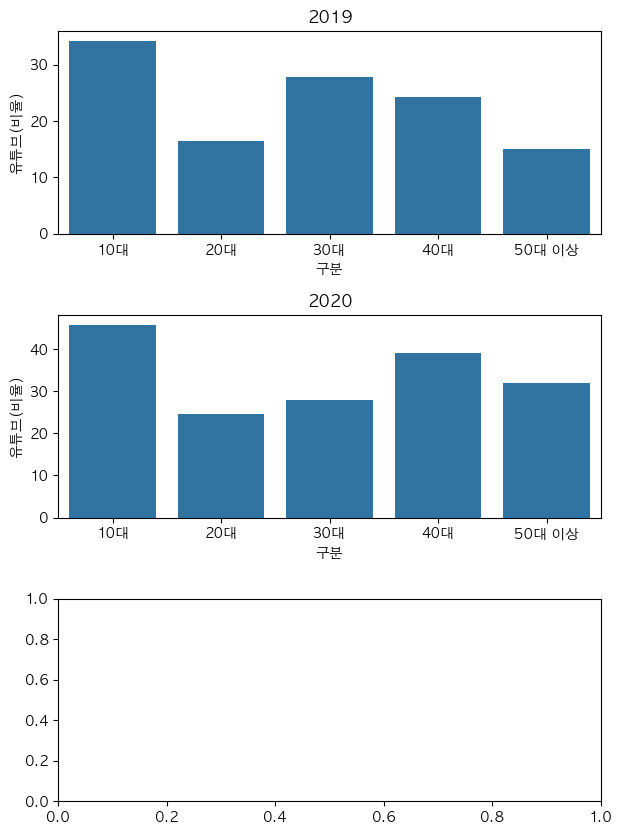

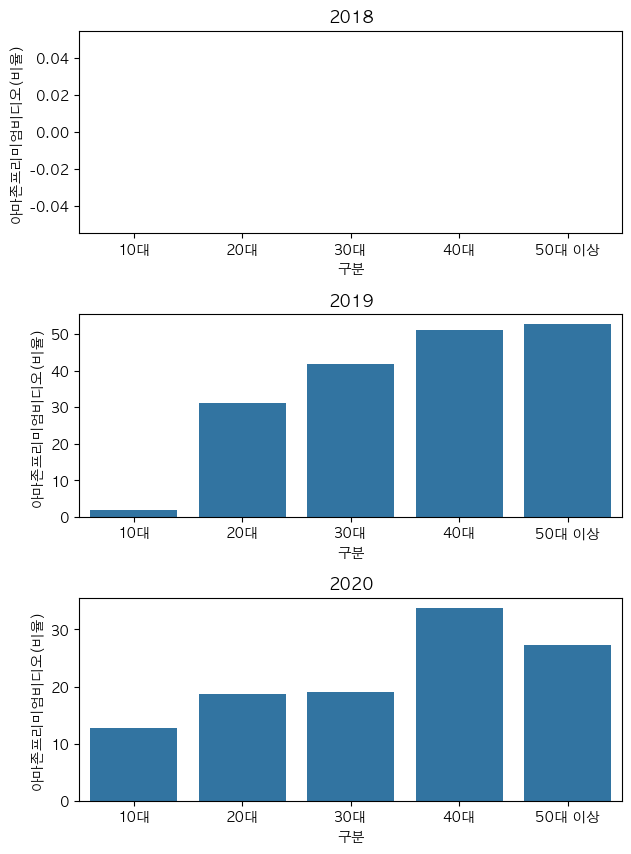

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# '구분' 열의 값이 10대, 20대, 30대, 40대, 50대 이상인 데이터만 선택
selected_age_data = Europe_df[Europe_df['구분'].isin(['10대', '20대', '30대', '40대', '50대 이상'])]

# 조사연도별로 연령대 비율 합산
grouped_data = selected_age_data.groupby(['구분', '조사연도']).sum().reset_index()

# 플롯 그리기
fig, ax = plt.subplots(3, 1, figsize=(7,10))
fig.subplots_adjust(hspace=0.4)

count = 0
columns = selected_age_data['구분'].unique()

for row in range(3):
    sns.barplot(data=grouped_data[grouped_data['조사연도'] == grouped_data['조사연도'].unique()[count]], x='구분', y='아마존프리미엄비디오(비율)', ax=ax[row])
    ax[row].set_title(f'{grouped_data["조사연도"].unique()[count]}', fontsize=12)
    # ax[row].set_xlabel('Age')
    # ax[row].set_ylabel('Total Ratio')/
    count += 1

plt.show()


상관관계 확인

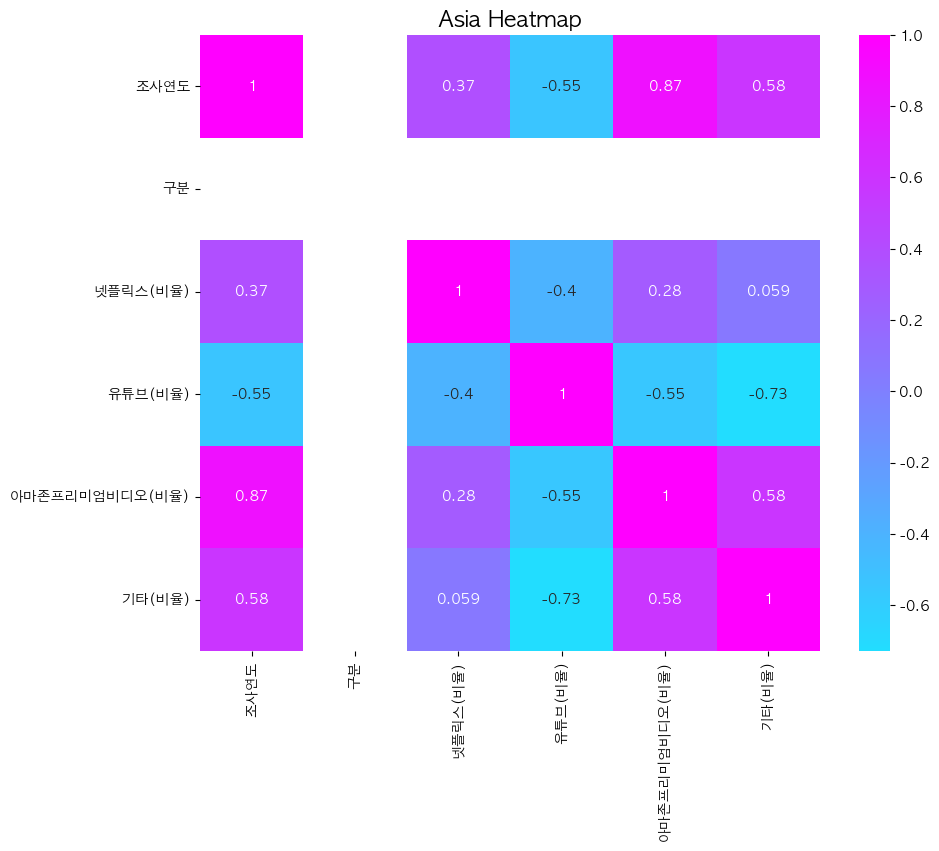

In [ ]:
# '전체'를 0으로 대체 또는 다른 숫자로 변환
Asia_df = Asia_df.replace('전체', 0)
Asia_df = Asia_df.replace('10대', 0)
Asia_df = Asia_df.replace('20대', 0)
Asia_df = Asia_df.replace('30대', 0)
Asia_df = Asia_df.replace('40대', 0)
Asia_df = Asia_df.replace('50대 이상', 0)
# NaN 값을 0으로 대체
Asia_df = Asia_df.fillna(0)

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(Asia_df.corr(), annot=True, cmap='cool', center=0)
plt.title('Asia Heatmap', fontsize=16)
plt.show()


In [ ]:
Europe_df.tail(500)

,조사연도,구분,사례수(명),넷플릭스(비율),유튜브(비율),아마존프리미엄비디오(비율),디즈니플러스(비율),애플티비(비율),기타(비율)
0,2018,전체,192,24.0,22.9,0.0,0.0,0.0,10.4
1,2018,10대,36,38.9,22.2,0.0,0.0,0.0,11.1
2,2018,20대,48,20.8,20.8,0.0,0.0,0.0,10.4
3,2018,30대,45,20.0,17.8,0.0,0.0,0.0,11.1
4,2018,40대,44,20.5,25.0,0.0,0.0,0.0,13.6
...,...,...,...,...,...,...,...,...,...
218,2020,가사노동자,28,21.4,32.1,3.6,0.0,3.6,7.1
219,2020,은퇴자,16,43.8,18.8,12.5,0.0,0.0,0.0
220,2020,무직/구직 중,12,50.0,25.0,8.3,0.0,0.0,0.0
221,2020,평균 이하,165,33.9,23.6,4.2,0.6,1.8,8.4


In [ ]:
# Europe_df = Europe_df.replace('전체', 0)
# Europe_df = Europe_df.replace('10대', 0)
# Europe_df = Europe_df.replace('20대', 0)
# Europe_df = Europe_df.replace('30대', 0)
# Europe_df = Europe_df.replace('40대', 0)
# Europe_df = Europe_df.replace('50대 이상', 0)
# Europe_df = Europe_df.replace('남성', 0)
# Europe_df = Europe_df.replace('여성', 0)
# Europe_df = Europe_df.replace('고졸 이하', 0)
# Europe_df = Europe_df.replace('대졸 이상', 0)
plt.figure(figsize=(10, 8))
sns.heatmap(Europe_df.corr(), annot = True, cmap = 'cool', center = 0)
plt.title('Europe Heatmap', fontsize = 16)
plt.show()

ValueError: could not convert string to float: '전체'

<Figure size 1000x800 with 0 Axes>

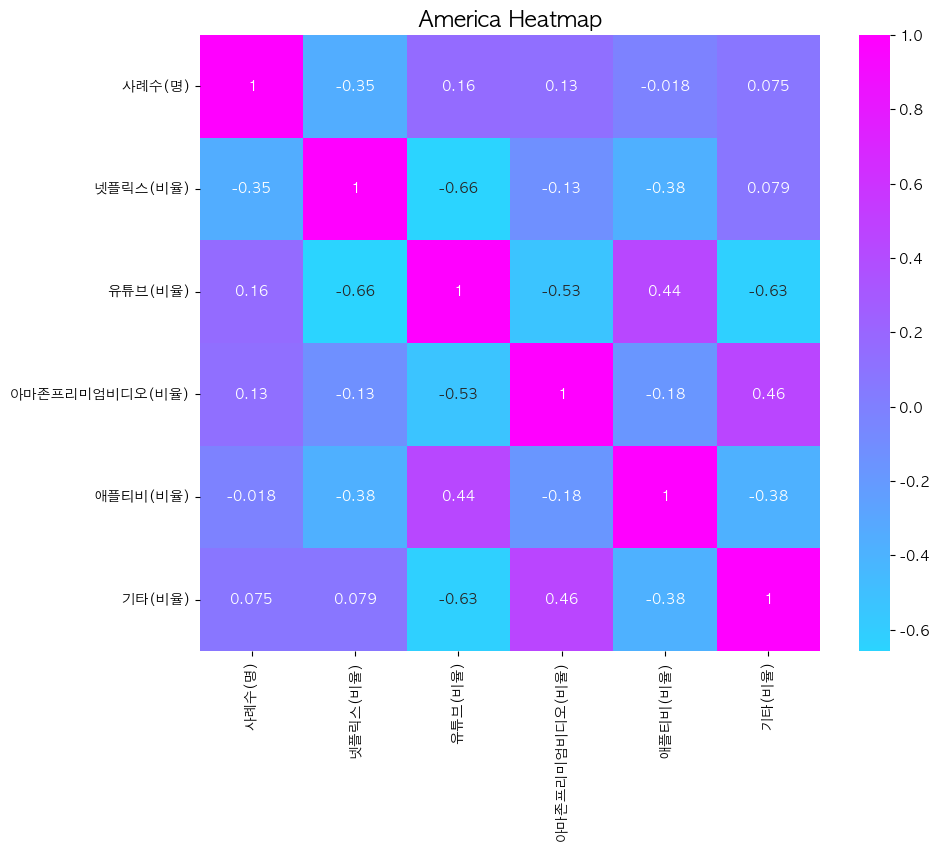

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(America_df.corr(), annot = True, cmap = 'cool', center = 0)
plt.title('America Heatmap', fontsize = 16)
plt.show()

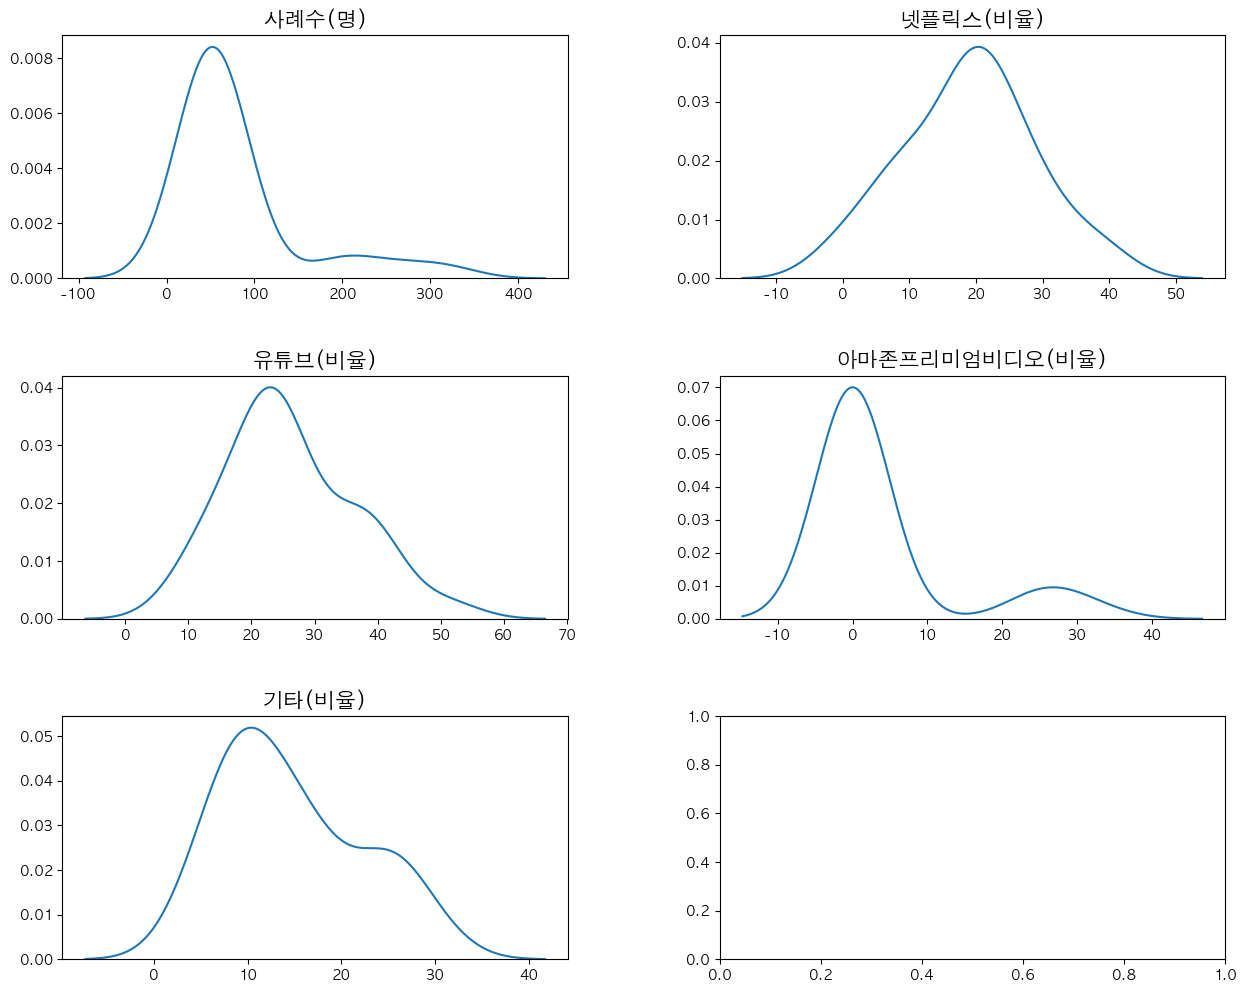

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(15, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

count = 0
columns = Asia_df.columns

for row in range(3):
    for col in range(2):
        if count < len(columns):
            sns.kdeplot(Asia_df[columns[count]], ax=ax[row][col])
            ax[row][col].set_title(columns[count], fontsize=15)
            ax[row][col].set_xlabel('')
            ax[row][col].set_ylabel('')
            count += 1
        else:
            break

plt.show()


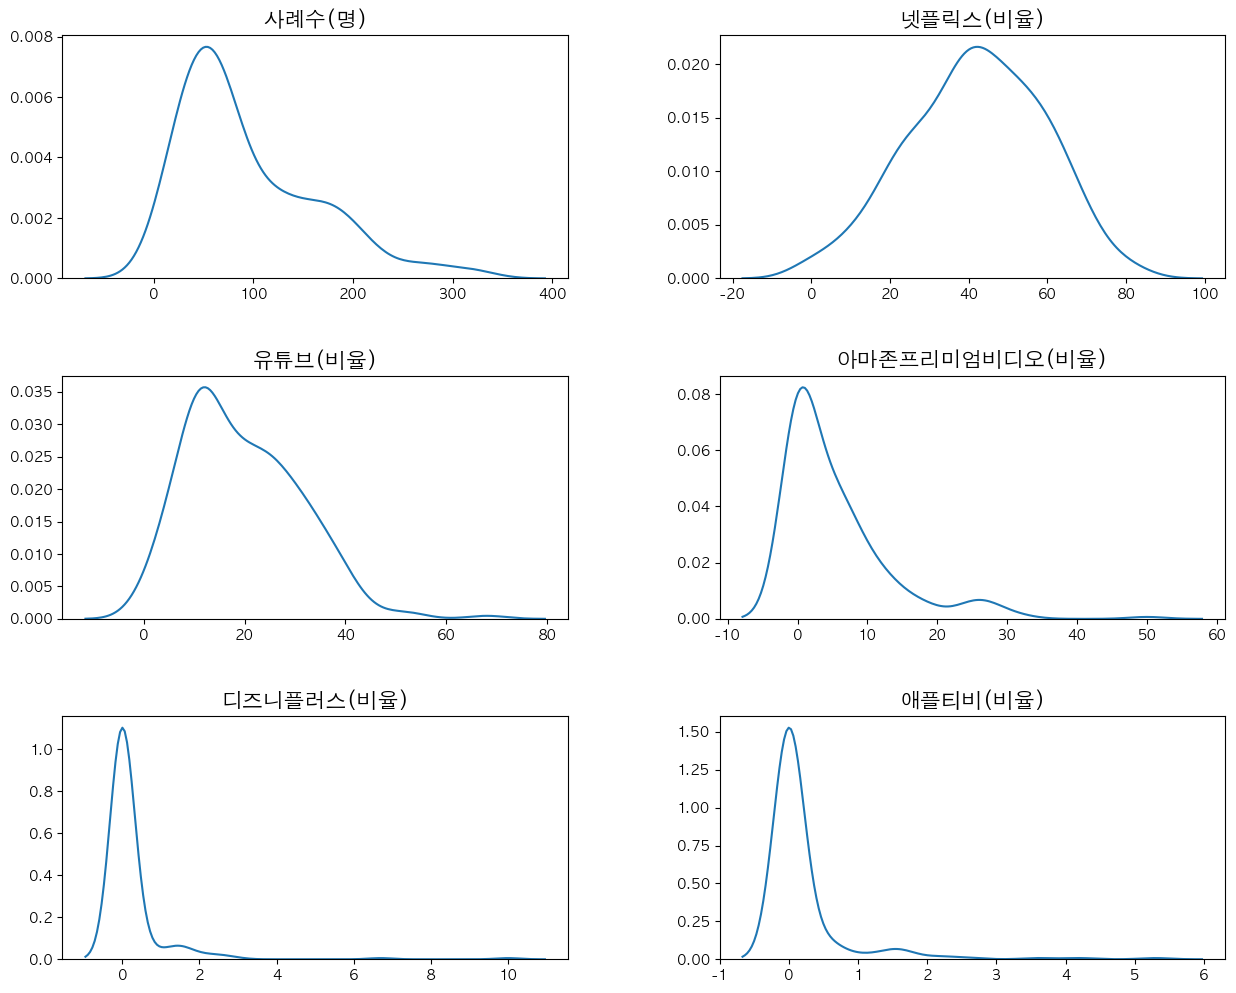

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(15, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

count = 0
columns = Europe_df.columns

for row in range(3):
    for col in range(2):
        if count < len(columns):
            sns.kdeplot(Europe_df[columns[count]], ax=ax[row][col])
            ax[row][col].set_title(columns[count], fontsize=15)
            ax[row][col].set_xlabel('')
            ax[row][col].set_ylabel('')
            count += 1
        else:
            break

plt.show()


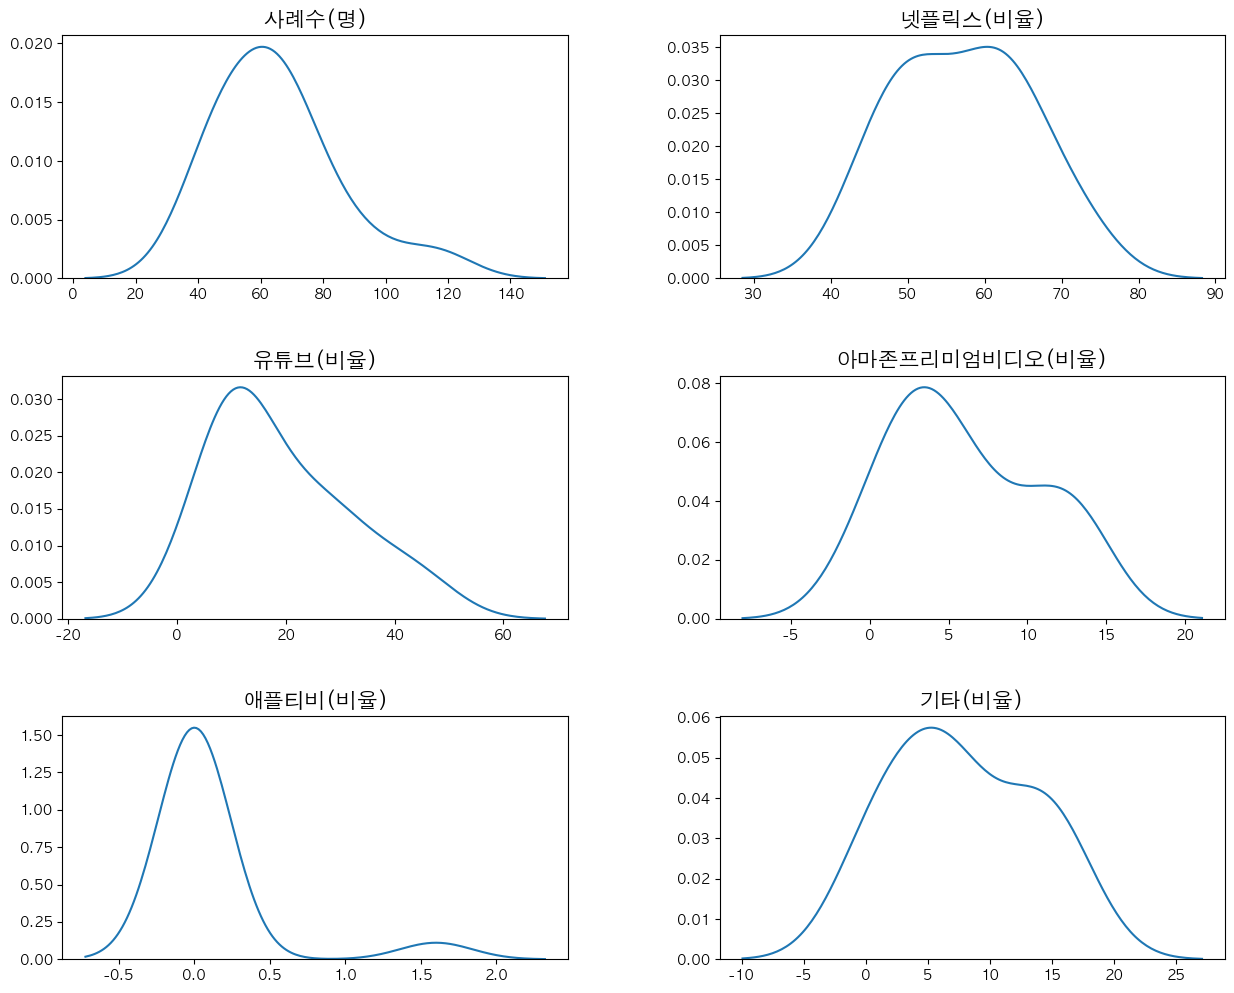

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(15, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

count = 0
columns = America_df.columns

for row in range(3):
    for col in range(2):
        if count < len(columns):
            sns.kdeplot(America_df[columns[count]], ax=ax[row][col])
            ax[row][col].set_title(columns[count], fontsize=15)
            ax[row][col].set_xlabel('')
            ax[row][col].set_ylabel('')
            count += 1
        else:
            break

plt.show()


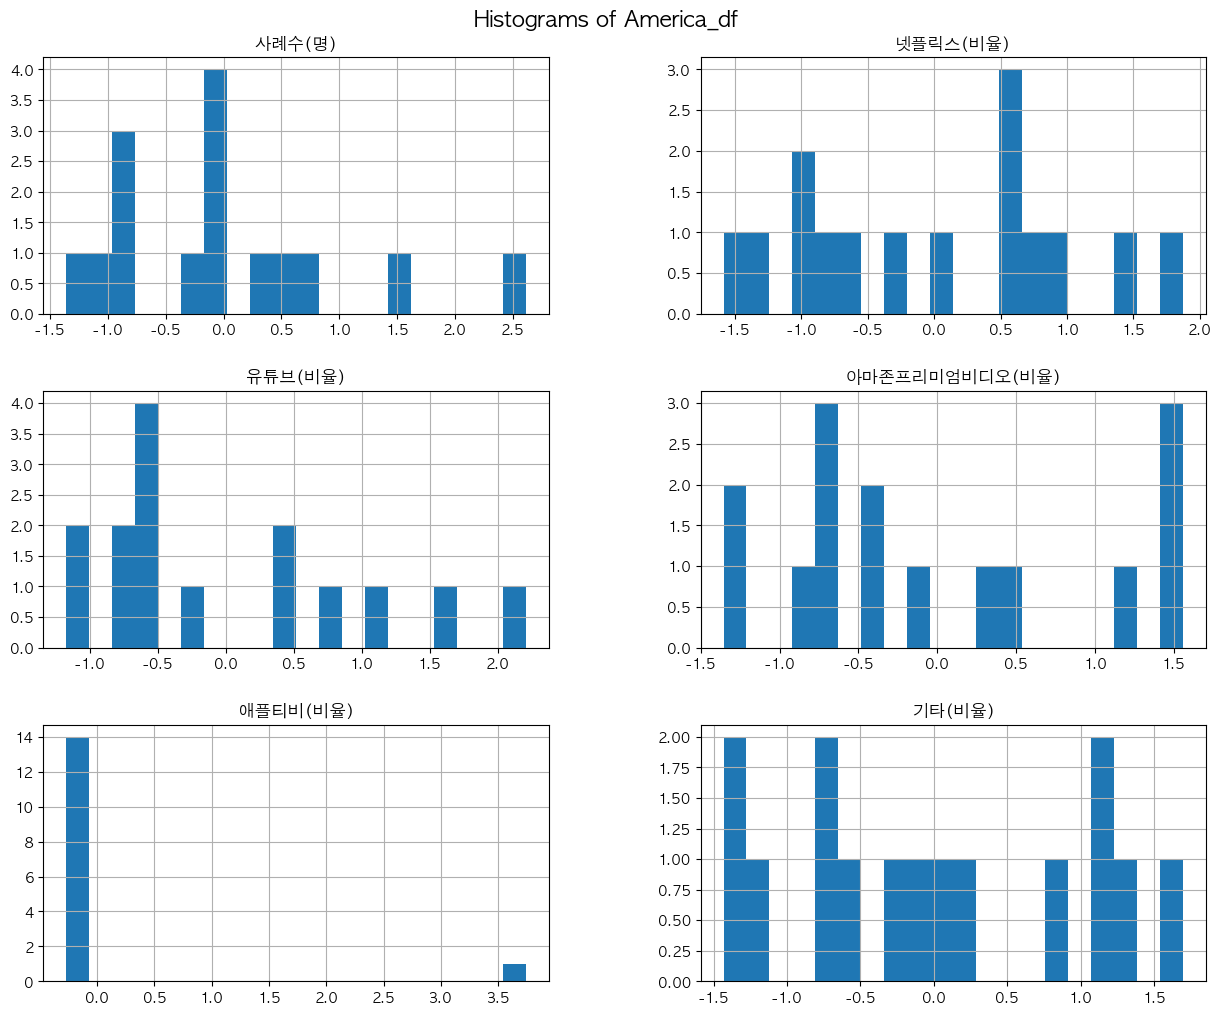

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# America_df에서 NaN 값을 평균으로 대체
imputer = SimpleImputer(strategy='mean')
America_df_imputed = pd.DataFrame(imputer.fit_transform(America_df), columns=America_df.columns)

# StandardScaler를 사용하여 표준화
scaler = StandardScaler()
America_df_scaled = pd.DataFrame(scaler.fit_transform(America_df_imputed), columns=America_df.columns)

# 히스토그램 그리기
America_df_scaled.hist(figsize=(15, 12), bins=20)
plt.suptitle('Histograms of America_df', y=0.92, fontsize=16)
plt.show()
